### 1) 랜덤 포레스트 분류

- 유방암 분류 데이터를 이용하여 진행해보겠습니다.

In [47]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
# 데이터에 대한 전반적인 설명을 볼 수 있는 코드
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 30)

- 유방암 분류 데이터는 30가지의 열을 가지고 유방암 이다, 아니다를 분류하는 데이터입니다.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


- 먼저 의사결정나무와 랜덤포레스트 분류기를 생성하여 어느 분류기가 좋은지 살펴보겠습니다.
- 의사결정나무와 관련된 개념은 다음 게시글을 참고해주세요. https://dacon.io/codeshare/4522?page=1&dtype=recent&utm_source=dacrew&utm_medium=409575&utm_campaign=dacrew_1

#### 의사결정나무 vs 랜덤포레스트

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 분류기 생성
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# 개별 모델 학습, 평가, 예측
estimators = [tree, rf]

for estimator in estimators :
    estimator.fit(X_train, y_train)
    pred = estimator.predict(X_test)
    
    class_name = estimator.__class__.__name__
    print('{} 분류기 정확도 : {}'.format(class_name, accuracy_score(y_test, pred)))

DecisionTreeClassifier 분류기 정확도 : 0.9300699300699301
RandomForestClassifier 분류기 정확도 : 0.958041958041958


- 정확도를 비교해보았더니 랜덤포레스트 분류기가 정확도가 더 좋은 것을 확인해보았습니다.
- sssssun님의 게시글인 k-fold 교차검증을 적용시켜보고 싶어서 랜덤포레스트를 이용하여 k-fold 교차검증(Cross Entropy)를 해보겠습니다.

- sssssun님의 게시글 안에 k-fold 교차검증에 관한 내용이 잘 정리되어 있으니 개념과 코드를 참고하시면 좋을 것 같습니다! https://dacon.io/codeshare/4546?page=1&dtype=recent

#### 5-fold 교차검증

In [11]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5)
cv_accuracy = []
n_iter = 0

n_iter =0
for train_index, test_index in kfold.split(cancer.data):  
    X_train, X_test = cancer.data[train_index], cancer.data[test_index]
    y_train, y_test = cancer.target[train_index], cancer.target[test_index]
    
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4) 
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)


#1 교차 검증 정확도 : 0.9035,  학습 데이터 크기 : 455,  검증 데이터 크기 : 114
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113]

#2 교차 검증 정확도 : 0.9561,  학습 데이터 크기 : 455,  검증 데이터 크기 : 114
#2 검증 세트 인덱스 : [114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 20

- k-fold 교차검증에서 제가 느꼈던 문제점은 나눠진 데이터마다 정확도가 천차만별이 된다는 것이었습니다. 실제 결과에서도 많이는 아니지만 높은건 99%의 정확도를, 낮은건 90% 정확도를 가진다는 것을 확인하였습니다.
- 정확도의 평균을 내어보고 shuffle 속성을 True로 바꾸어 다시 시도해보겠습니다.

In [14]:
print('평균 검증 정확도:', np.mean(cv_accuracy))

평균 검증 정확도: 0.9561


In [15]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5, shuffle=True)
cv_accuracy = []
n_iter = 0

n_iter =0
for train_index, test_index in kfold.split(cancer.data):  
    X_train, X_test = cancer.data[train_index], cancer.data[test_index]
    y_train, y_test = cancer.target[train_index], cancer.target[test_index]
    
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4) 
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)


#1 교차 검증 정확도 : 0.9737,  학습 데이터 크기 : 455,  검증 데이터 크기 : 114
#1 검증 세트 인덱스 : [ 12  14  16  20  23  24  33  34  35  39  40  45  46  48  50  57  61  70
  77  86  90  92  99 102 104 106 108 111 121 142 147 151 153 156 174 180
 188 189 192 196 206 207 212 219 220 222 237 239 241 248 258 263 265 268
 271 275 280 281 283 287 290 291 292 300 301 305 310 312 313 320 323 325
 331 342 346 356 365 370 378 382 390 397 413 415 417 418 422 423 429 434
 442 444 445 458 468 484 488 499 504 509 512 513 519 520 526 529 538 541
 542 543 550 553 555 560]

#2 교차 검증 정확도 : 0.9737,  학습 데이터 크기 : 455,  검증 데이터 크기 : 114
#2 검증 세트 인덱스 : [  0   4  21  29  31  32  36  52  53  63  74  78  79  83  87  88  95  96
 103 105 119 122 126 131 132 144 161 162 177 184 197 199 200 204 209 213
 217 223 225 226 228 230 245 250 253 256 262 266 269 270 273 274 293 294
 295 315 316 318 319 324 327 328 333 341 350 352 354 355 358 360 364 379
 380 381 385 386 393 399 402 405 414 419 425 426 427 428 430 436 441 446
 448 452 459 471 474 47

In [16]:
print('평균 검증 정확도:', np.mean(cv_accuracy))

평균 검증 정확도: 0.95784


- shuffle = True 기능을 이용하여 편차를 조금은 극복한 것 같기는 한데 결과값을 보니 비슷한 것 같습니다! :) 그래도 데이터가 골고루 섞여있음을 확인할 수 있습니다.
- 현재의 모형같은 경우 하이퍼 파라미터를 기본값으로 두고 결과를 도출하였습니다. 따라서 이번에는 grid search 알고리즘을 이용하여 적절한 하이퍼 파라미터값을 찾아주도록 하겠습니다.

#### Grid Search 알고리즘

- Grid Search(격자 탐색)은 모델 하이퍼 파라미터에 넣을 수 있는 값들을 순차적으로 입력한 뒤에 가장 높은 성능을 보이는 하이퍼 파라미터들을 찾는 탐색법입니다.

In [18]:
param_grid = {'n_estimators':range(100, 1000, 100),
             'max_features':['auto','sqrt','log2']}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 1000, 100)})

In [19]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'log2', 'n_estimators': 900}
Best Score: 0.9650
TestSet Score: 0.9381


- 하이퍼 파라미터의 범위를 잘못 설정해줬는지, 기본값의, 성능이 좋아서 그런건지는 잘 모르겠지만 test dataset의 값이 그렇게 높지는 않습니다 ㅠㅠ 

- 굳이 값 하나씩 변경해서 넣어주기 보다는 요렇게 범위를 지어서 해주면 조금 더 수월하게 하이퍼 파라미터의 값을 변경할 수 있습니다.

- param_grid 부분에 구하고 싶은 범위를 넣고 대입하면 다른 결과값이 나오니 실습을 하실 분들은 요걸 참고해서 해보시면 좋을 것 같습니다 :)

### 2) 랜덤 포레스트 회귀

- 회귀 데이터로는 wine 데이터를 이용하겠습니다.
- 원래 wine 데이터의 target은 0,1,2인 분류 데이터인데 요기에서는 target 값으로 alcohol로 하여 회귀 데이터로 쓰입니다.

In [21]:
from sklearn.datasets import load_wine

data = load_wine()   # data load 
data.target[[10, 80, 140]] # [0,1,2]
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.columns)
df.head()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
df.shape

(178, 13)

In [23]:
X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 12)
(45, 12)
(133,)
(45,)


In [26]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train, y_train)
pred_train=model.predict(X_train)
model.score(X_train, y_train)

0.9335227336924459

In [27]:
pred_test=model.predict(X_test)
model.score(X_test, y_test)

0.6490500515893961

- train dataset에 비하여 test dataset의 결과가 현저히 안좋은 것을 확인할 수 있습니다.
- 회귀의 판단척도는 정확도보다는 다른 판단척도를 많이 사용하니 RMSE(Root Mean Square Error)를 이용하여 다시 살펴보겠습니다.

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print("훈련데이터rmse", np.sqrt(mse_train))
print("테스트데이터rmse", np.sqrt(mse_test))

훈련데이터rmse 0.2131926685178785
테스트데이터rmse 0.4443321132766444


- 마찬가지로 train dataset보다 현저히 높은 수를 가지고 있음을 확인할 수 있습니다. 
- 따라서 k-fold를 이용하여 test dataset을 계속 바꾸어보겠습니다.

In [34]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5)
cv_mse = []
n_iter = 0

n_iter =0
for train_index, test_index in kfold.split(X):  
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    n_iter += 1
    
    mse = np.round(mean_squared_error(y_test, pred), 4) 
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 mase : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, mse, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_mse.append(mse)


#1 교차 검증 mase : 0.3218,  학습 데이터 크기 : 142,  검증 데이터 크기 : 36
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]

#2 교차 검증 mase : 0.3277,  학습 데이터 크기 : 142,  검증 데이터 크기 : 36
#2 검증 세트 인덱스 : [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]

#3 교차 검증 mase : 0.2555,  학습 데이터 크기 : 142,  검증 데이터 크기 : 36
#3 검증 세트 인덱스 : [ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]

#4 교차 검증 mase : 0.4774,  학습 데이터 크기 : 143,  검증 데이터 크기 : 35
#4 검증 세트 인덱스 : [108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142]

#5 교차 검증 mase : 0.5951,  학습 데이터 크기 : 143,  검증 데이터 크기 : 35
#5 검증 세트 인덱스 : [143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 

In [35]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5, shuffle = True)
cv_mse = []
n_iter = 0

n_iter =0
for train_index, test_index in kfold.split(X):  
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    n_iter += 1
    
    mse = np.round(mean_squared_error(y_test, pred), 4) 
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 mase : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, mse, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_mse.append(mse)


#1 교차 검증 mase : 0.4878,  학습 데이터 크기 : 142,  검증 데이터 크기 : 36
#1 검증 세트 인덱스 : [  1   3  11  14  17  18  19  20  23  26  28  29  50  55  57  62  63  68
  71  88 101 105 117 118 121 122 126 127 130 131 135 137 142 153 165 172]

#2 교차 검증 mase : 0.2092,  학습 데이터 크기 : 142,  검증 데이터 크기 : 36
#2 검증 세트 인덱스 : [  0   2  12  13  25  36  38  39  41  43  49  52  58  64  65  69  70  74
  75  86 109 114 119 136 143 145 146 147 148 150 152 154 159 166 173 175]

#3 교차 검증 mase : 0.2445,  학습 데이터 크기 : 142,  검증 데이터 크기 : 36
#3 검증 세트 인덱스 : [ 21  22  30  34  44  45  48  56  66  73  77  78  79  82  91  92  98 104
 106 108 110 123 125 128 140 144 149 151 155 157 160 162 163 168 169 174]

#4 교차 검증 mase : 0.2616,  학습 데이터 크기 : 143,  검증 데이터 크기 : 35
#4 검증 세트 인덱스 : [  4   9  15  16  27  31  33  35  37  42  46  51  54  59  67  72  76  80
  94  95 100 102 103 107 112 115 116 120 132 134 138 161 167 176 177]

#5 교차 검증 mase : 0.235,  학습 데이터 크기 : 143,  검증 데이터 크기 : 35
#5 검증 세트 인덱스 : [  5   6   7   8  10  24  32  40  47  53  60  6

In [36]:
print('평균 검증 정확도:', np.mean(cv_mse))

평균 검증 정확도: 0.28762


- 앞에서 하던 grid search 대신에 이번에는 feature importance를 구해보겠습니다.
- 랜덤 포레스트의 큰 장점중 하나는 변수 중요도를 구할 수 있어 어떤 변수가 종속 변수에 영향을 가장 많이 미치고 있는지 확인할 수 있습니다.

#### Feature Importance(변수 중요도)

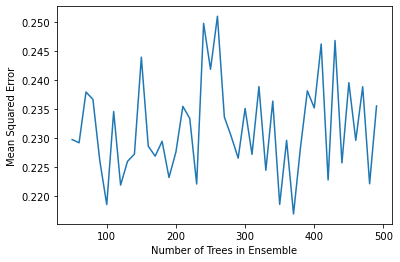

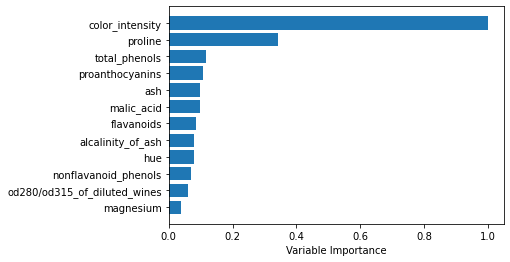

In [41]:
import matplotlib.pyplot as plot

mse_score = []
nTreeList = range(50,500,10)
wineNames = np.array(data.feature_names[1:])

for iTrees in nTreeList:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    #데이터 세트에 대한 MSE 누적
    pred = model.predict(X_test)
    mse_score.append(mean_squared_error(y_test, pred))


plot.plot(nTreeList, mse_score)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
plot.show()

#피처 중요도 도표 그리기
featureImportance = model.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, wineNames[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()

- wine 가격에 영향을 가장 많이 주는건 color_intensity입니다. 즉, 색상 강도에 따라 wine의 알코올 %가 결정에 영향을 많이 준다는 것입니다.

### [마무리]

- 오늘은 분류, 회귀 데이터를 이용하여 랜덤 포레스트 실습을 해보았습니다.
- 다른 게시글과 다르게 k-fold를 적용하여 결과값을 도출하였습니다. 신기신기
- 다음 주제로 추전해주실 머신러닝 기법이 있으신가요 ~?

### [Reference]

[1] 랜덤포레스트 분류 예시 :  https://kimdingko-world.tistory.com/180<br>
[2] Grid Search 알고리즘 : https://huidea.tistory.com/32<br>
[3] 전반적인 코드 : 와이즈컴퍼니 2021 빅데이터분석기사 실기 책<br>
[4] 랜덤포레스트 회귀 예시 : https://riverzayden.tistory.com/14